### Part 2(b)

#### Evaluate whether older planes suffer more delay on a year to year basis

##### Importing Operating System & Libraries

In [2]:
import os
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

##### Setting Working Directory

In [3]:
os.chdir("/Users/rohanchhabra/Desktop/Airline")
os.getcwd()

'/Users/rohanchhabra/Desktop/Airline'

##### Loading, Processing & Cleaning (Plane & Flight Data)

In [4]:
#Loading plane data
plane_data = pd.read_csv("plane-data.csv")

In [5]:
plane_data.columns

Index(['tailnum', 'type', 'manufacturer', 'issue_date', 'model', 'status',
       'aircraft_type', 'engine_type', 'year'],
      dtype='object')

In [6]:
plane_data.dtypes

tailnum          object
type             object
manufacturer     object
issue_date       object
model            object
status           object
aircraft_type    object
engine_type      object
year             object
dtype: object

In [7]:
plane_data['year'] = pd.to_numeric(plane_data['year'], errors='coerce').fillna(0).astype(int)
plane_data[['tailnum','year']]

,tailnum,year
0,N050AA,0
1,N051AA,0
2,N052AA,0
3,N054AA,0
4,N055AA,0
...,...,...
5024,N997DL,1992
5025,N998AT,2002
5026,N998DL,1992
5027,N999CA,1998


In [8]:
plane_data.isnull().sum()

tailnum            0
type             549
manufacturer     549
issue_date       549
model            549
status           549
aircraft_type    549
engine_type      549
year               0
dtype: int64

In [10]:
plane_data.drop_duplicates(inplace=True)

In [11]:
plane_data.shape

(5029, 9)

In [12]:
#Loading processed flight data for each year (1998-2007)
flight_data = pd.concat([pd.read_csv(f"{year}_processed.csv",
     ) for year in range(1998, 2008)])

/var/folders/mj/62q_11l1527c23vm0hjdn9vm0000gn/T/ipykernel_32367/2005838462.py:2: DtypeWarning: Columns (22) have mixed types. Specify dtype option on import or set low_memory=False.
  flight_data = pd.concat([pd.read_csv(f"{year}_processed.csv",
/var/folders/mj/62q_11l1527c23vm0hjdn9vm0000gn/T/ipykernel_32367/2005838462.py:2: DtypeWarning: Columns (22) have mixed types. Specify dtype option on import or set low_memory=False.
  flight_data = pd.concat([pd.read_csv(f"{year}_processed.csv",
/var/folders/mj/62q_11l1527c23vm0hjdn9vm0000gn/T/ipykernel_32367/2005838462.py:2: DtypeWarning: Columns (22) have mixed types. Specify dtype option on import or set low_memory=False.
  flight_data = pd.concat([pd.read_csv(f"{year}_processed.csv",
/var/folders/mj/62q_11l1527c23vm0hjdn9vm0000gn/T/ipykernel_32367/2005838462.py:2: DtypeWarning: Columns (22) have mixed types. Specify dtype option on import or set low_memory=False.
  flight_data = pd.concat([pd.read_csv(f"{year}_processed.csv",


#### Flight Data Preparation

In [13]:
flight_data[['Year', 'Month', 'DayofMonth', 'DayOfWeek', 'DepTime', 'CRSDepTime',
       'ArrTime', 'CRSArrTime', 'UniqueCarrier', 'FlightNum', 'TailNum',
       'ActualElapsedTime', 'CRSElapsedTime', 'AirTime', 'ArrDelay',
       'DepDelay', 'Origin', 'Dest', 'Distance', 'TaxiIn', 'TaxiOut',
       'Cancelled', 'CancellationCode', 'Diverted', 'CarrierDelay',
       'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay']]

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,1998,1,17,6,715.0,715,840.0,840,WN,76,...,3,5,0,NaN,0,NaN,NaN,NaN,NaN,NaN
1,1998,1,18,7,715.0,715,830.0,840,WN,76,...,2,6,0,NaN,0,NaN,NaN,NaN,NaN,NaN
2,1998,1,19,1,715.0,715,831.0,840,WN,76,...,3,5,0,NaN,0,NaN,NaN,NaN,NaN,NaN
3,1998,1,20,2,715.0,715,836.0,840,WN,76,...,3,12,0,NaN,0,NaN,NaN,NaN,NaN,NaN
4,1998,1,21,3,715.0,715,836.0,840,WN,76,...,3,6,0,NaN,0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7275283,2007,12,15,6,1558.0,1605,1749.0,1736,DL,58,...,14,17,0,NaN,0,0.0,0.0,0.0,0.0,0.0
7275284,2007,12,15,6,1902.0,1851,2110.0,2105,DL,59,...,6,21,0,NaN,0,0.0,0.0,0.0,0.0,0.0
7275285,2007,12,15,6,1024.0,1025,1750.0,1735,DL,61,...,14,19,0,NaN,0,0.0,0.0,15.0,0.0,0.0
7275286,2007,12,15,6,1353.0,1315,1658.0,1622,DL,62,...,11,14,0,NaN,0,0.0,0.0,0.0,0.0,36.0


In [14]:
flight_data=flight_data[['Year', 'DayOfWeek', 'DepTime', 'CRSDepTime',
       'ArrTime', 'CRSArrTime', 'TailNum',
        'AirTime', 'ArrDelay',
       'DepDelay', 'Origin', 'Dest']]

In [417]:
flight_data.dtypes

Year            int64
DayOfWeek       int64
DepTime        object
CRSDepTime      int64
ArrTime       float64
CRSArrTime      int64
TailNum        object
AirTime       float64
ArrDelay      float64
DepDelay      float64
Origin         object
Dest           object
dtype: object

In [15]:
flight_data.DepTime=flight_data.DepTime.astype(int)
flight_data['DepTime'] = flight_data['DepTime'].astype(str).str.zfill(4)
flight_data['Hour']=flight_data['DepTime'].str.slice(0, 2)
flight_data['DepTime']

0          0715
1          0715
2          0715
3          0715
4          0715
           ... 
7275283    1558
7275284    1902
7275285    1024
7275286    1353
7275287    1824
Name: DepTime, Length: 61625251, dtype: object

In [16]:
flight_data.head()

,Year,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,TailNum,AirTime,ArrDelay,DepDelay,Origin,Dest,Hour
0,1998,6,0715,715,840.0,840,N520,137.0,0.0,0.0,AUS,PHX,07
1,1998,7,0715,715,830.0,840,N302,127.0,-10.0,0.0,AUS,PHX,07
2,1998,1,0715,715,831.0,840,N315,128.0,-9.0,0.0,AUS,PHX,07
3,1998,2,0715,715,836.0,840,N372,126.0,-4.0,0.0,AUS,PHX,07
4,1998,3,0715,715,836.0,840,N367,132.0,-4.0,0.0,AUS,PHX,07


In [18]:
flight_data.shape

(61625251, 13)

#### Calculating Average of Arrival & Departure Delays

In [19]:
flight_data['AvgDelay'] = (flight_data['ArrDelay'] + flight_data['DepDelay']) / 2

In [20]:
flight_data.head()

,Year,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,TailNum,AirTime,ArrDelay,DepDelay,Origin,Dest,Hour,AvgDelay
0,1998,6,0715,715,840.0,840,N520,137.0,0.0,0.0,AUS,PHX,07,0.0
1,1998,7,0715,715,830.0,840,N302,127.0,-10.0,0.0,AUS,PHX,07,-5.0
2,1998,1,0715,715,831.0,840,N315,128.0,-9.0,0.0,AUS,PHX,07,-4.5
3,1998,2,0715,715,836.0,840,N372,126.0,-4.0,0.0,AUS,PHX,07,-2.0
4,1998,3,0715,715,836.0,840,N367,132.0,-4.0,0.0,AUS,PHX,07,-2.0


In [21]:
#Checking Columns (Plane Data- tailnum, Flight Data -tailNum)
print("plane_data columns:", plane_data.columns)
print("flight_data columns:", flight_data.columns)

plane_data columns: Index(['tailnum', 'type', 'manufacturer', 'issue_date', 'model', 'status',
       'aircraft_type', 'engine_type', 'year'],
      dtype='object')
flight_data columns: Index(['Year', 'DayOfWeek', 'DepTime', 'CRSDepTime', 'ArrTime', 'CRSArrTime',
       'TailNum', 'AirTime', 'ArrDelay', 'DepDelay', 'Origin', 'Dest', 'Hour',
       'AvgDelay'],
      dtype='object')


In [22]:
plane_data.dtypes

tailnum          object
type             object
manufacturer     object
issue_date       object
model            object
status           object
aircraft_type    object
engine_type      object
year              int64
dtype: object

In [23]:
flight_data.dtypes

Year            int64
DayOfWeek       int64
DepTime        object
CRSDepTime      int64
ArrTime       float64
CRSArrTime      int64
TailNum        object
AirTime       float64
ArrDelay      float64
DepDelay      float64
Origin         object
Dest           object
Hour           object
AvgDelay      float64
dtype: object

In [24]:
plane_data.tailnum.isnull().sum()

0

In [25]:
flight_data[flight_data['TailNum'].isin(plane_data.tailnum)]

,Year,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,TailNum,AirTime,ArrDelay,DepDelay,Origin,Dest,Hour,AvgDelay
162,1998,4,0935,935,1304.0,1319,N901AW,311.0,-15.0,0.0,BOS,PHX,09,-7.5
163,1998,5,0935,935,1314.0,1319,N910AW,309.0,-5.0,0.0,BOS,PHX,09,-2.5
165,1998,7,1009,935,1330.0,1319,N903AW,303.0,11.0,34.0,BOS,PHX,10,22.5
166,1998,1,0933,935,1307.0,1319,N908AW,315.0,-12.0,-2.0,BOS,PHX,09,-7.0
167,1998,2,0935,935,1313.0,1319,N904AW,318.0,-6.0,0.0,BOS,PHX,09,-3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7275283,2007,6,1558,1605,1749.0,1736,N670DN,80.0,13.0,-7.0,MCO,ATL,15,3.0
7275284,2007,6,1902,1851,2110.0,2105,N829MH,221.0,5.0,11.0,ATL,SLC,19,8.0
7275285,2007,6,1024,1025,1750.0,1735,N623DL,233.0,15.0,-1.0,LAX,ATL,10,7.0
7275286,2007,6,1353,1315,1658.0,1622,N970DL,100.0,36.0,38.0,DFW,ATL,13,37.0


In [26]:
flight_data.head()

,Year,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,TailNum,AirTime,ArrDelay,DepDelay,Origin,Dest,Hour,AvgDelay
0,1998,6,0715,715,840.0,840,N520,137.0,0.0,0.0,AUS,PHX,07,0.0
1,1998,7,0715,715,830.0,840,N302,127.0,-10.0,0.0,AUS,PHX,07,-5.0
2,1998,1,0715,715,831.0,840,N315,128.0,-9.0,0.0,AUS,PHX,07,-4.5
3,1998,2,0715,715,836.0,840,N372,126.0,-4.0,0.0,AUS,PHX,07,-2.0
4,1998,3,0715,715,836.0,840,N367,132.0,-4.0,0.0,AUS,PHX,07,-2.0


In [27]:
flight_data.shape

(61625251, 14)

In [28]:
#Merging flight data witha plane data based on Tail Number using Inner Join
flight_data = flight_data.merge(plane_data, left_on="TailNum", right_on="tailnum", how="inner")

In [29]:
flight_data.dtypes

Year               int64
DayOfWeek          int64
DepTime           object
CRSDepTime         int64
ArrTime          float64
CRSArrTime         int64
TailNum           object
AirTime          float64
ArrDelay         float64
DepDelay         float64
Origin            object
Dest              object
Hour              object
AvgDelay         float64
tailnum           object
type              object
manufacturer      object
issue_date        object
model             object
status            object
aircraft_type     object
engine_type       object
year               int64
dtype: object

In [30]:
flight_data.shape

(35538550, 23)

#### Calculating Age of Plane (Year = Year of flight, year = year of manufacturing)

In [31]:
flight_data['Age'] = flight_data['Year'] - flight_data['year']

In [32]:
flight_data[['Year','year','Age','AvgDelay','TailNum','tailnum']]

,Year,year,Age,AvgDelay,TailNum,tailnum
0,1998,1985,13,-7.5,N901AW,N901AW
1,1998,1985,13,-3.5,N901AW,N901AW
2,1998,1985,13,-2.0,N901AW,N901AW
3,1998,1985,13,36.5,N901AW,N901AW
4,1998,1985,13,-1.0,N901AW,N901AW
...,...,...,...,...,...,...
35538545,2007,2007,0,16.5,N665JB,N665JB
35538546,2007,2007,0,6.5,N665JB,N665JB
35538547,2007,2007,0,-3.5,N665JB,N665JB
35538548,2007,2007,0,2.0,N665JB,N665JB


In [33]:
flight_data.dtypes

Year               int64
DayOfWeek          int64
DepTime           object
CRSDepTime         int64
ArrTime          float64
CRSArrTime         int64
TailNum           object
AirTime          float64
ArrDelay         float64
DepDelay         float64
Origin            object
Dest              object
Hour              object
AvgDelay         float64
tailnum           object
type              object
manufacturer      object
issue_date        object
model             object
status            object
aircraft_type     object
engine_type       object
year               int64
Age                int64
dtype: object

In [34]:
df_fg=flight_data[['Year','Age','AvgDelay']][flight_data['Age'] != flight_data['Year']].groupby(['Year','Age']).mean()
df_fg=df_fg.reset_index()

In [35]:
df_fg

,Year,Age,AvgDelay
0,1998,-9,3.873793
1,1998,-3,7.065341
2,1998,0,7.540707
3,1998,1,7.522831
4,1998,2,8.801757
...,...,...,...
404,2007,44,16.786154
405,2007,45,12.229450
406,2007,48,13.410758
407,2007,50,7.573964


##### Plotting relationship between age of plane & average delays

In [52]:
# Import libraries
import pandas as pd

# Create DataFrame
# df = pd.DataFrame({
#     'age': [1,20,30,31,50,60,61,80,90] #np.random.randint(1,100,50)
# })

# Function: Copy-pasted from question and modified
def get_num_plane_by_age_category(df_fg):
    df_fg["age_group"] = pd.cut(x=df_fg['Age'], bins=[0,5,15,100], labels=["New","Middle_Aged","Old"])
    return df_fg

In [53]:
# Call function
df_ag = get_num_plane_by_age_category(df_fg)

In [54]:
df_ag

,Year,Age,AvgDelay,age_group
0,1998,-9,3.873793,NaN
1,1998,-3,7.065341,NaN
2,1998,0,7.540707,NaN
3,1998,1,7.522831,New
4,1998,2,8.801757,New
...,...,...,...,...
404,2007,44,16.786154,Old
405,2007,45,12.229450,Old
406,2007,48,13.410758,Old
407,2007,50,7.573964,Old


In [55]:
filtered_df = df_ag[df_ag['age_group'].notnull()]

In [56]:
filtered_df

,Year,Age,AvgDelay,age_group
3,1998,1,7.522831,New
4,1998,2,8.801757,New
5,1998,3,6.551422,New
6,1998,4,7.653097,New
7,1998,5,7.495009,New
...,...,...,...,...
404,2007,44,16.786154,Old
405,2007,45,12.229450,Old
406,2007,48,13.410758,Old
407,2007,50,7.573964,Old


In [57]:
filtered_df.reset_index(drop=True, inplace=True)

In [58]:
filtered_df.pivot_table(index=['Year','age_group'])

Age   AvgDelay
Year age_group                        
1998 New           3.000000   7.604823
     Middle_Aged  10.500000   7.939576
     Old          27.523810   6.507127
1999 New           3.000000   7.804002
     Middle_Aged  10.500000   8.878906
     Old          27.954545   6.361313
2000 New           3.000000  10.265753
     Middle_Aged  10.500000  11.218427
     Old          28.391304   8.297596
2001 New           3.000000   4.200954
     Middle_Aged  11.000000   3.821866
     Old          26.000000   3.693357
2002 New           3.000000   3.176796
     Middle_Aged  10.500000   4.384317
     Old          29.280000   3.894967
2003 New           3.000000   4.254298
     Middle_Aged  10.500000   4.354905
     Old          30.333333   3.165428
2004 New           3.000000   6.399337
     Middle_Aged  10.500000   7.333859
     Old          31.034483   6.564421
2005 New           3.000000   7.775871
     Middle_Aged  10.500000   8.227304
     Old          31.500000   8.029915
2006 New           3.000000   9.830613
     Middle_Aged  10.500000   9.886554
     Old          31.967742   8.820965
2007 New           3.000000  10.653491
     Middle_Aged  10.500000  10.531070
     Old          32.437500  12.357125

<Axes: xlabel='Year'>

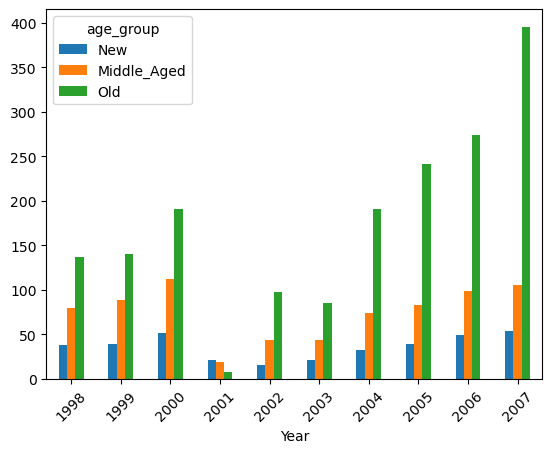

In [59]:
filtered_df.groupby(['Year', 'age_group'])['AvgDelay'].sum().unstack(1).plot.bar(rot=45)